# Planejamento Fatorial Completo

Este planejamento experimental destina-se a avaliar os efeitos e as interações entre variáveis que possam contribuir ou não para o experimento, de forma a encontrar a melhor condição experimental que maximize a variável resposta.

O experimento consiste na oxidação eletroquímica utilizando eletrodos circulares de Ti/IrO2 e Ti/SnO2 tendo como objetivo a oxidação do herbicida atrazina.

As variáveis estudadas são:

Variável 1: Tempo (min), 10 e 40
Variável 2: NaCl (g/L), 0,2 e 1,0
Variável 3: Corrente (A), 0,5 e 2,0
Variável 4: Tipo de anodo, IrO2 e SrO2.

Com 4 variáveis e o experimento sendo sem réplicas, a matriz de experimentos toma a forma de 16 experimentos.

Referência: ZAVISKA, François et al. Experimental design methodology applied to electrochemical oxidation of the herbicide atrazine using Ti/IrO2 and Ti/SnO2 circular anode electrodes. **Jornal of Hazardous Materials.** n.185, p.1499-1507, 2011.

In [ ]:
#Instalando a biblioteca para gerar a matriz de experimentos
!pip install pydoe2

In [3]:
import numpy as np
import pandas as pd
import pyDOE2
import matplotlib.pyplot as plt

In [4]:
#Matriz de experimentos codificado com 4 fatores
matriz = pyDOE2.ff2n(4)

In [5]:
#Convertendo o array em dataframe
matriz = pd.DataFrame(matriz, columns=['Tempo(v1)', 'NaCl(v2)', 'Corrente(v3)', 'Anodo(v4)'])

In [6]:
#Visualizando a matriz codificada
matriz

,Tempo(v1),NaCl(v2),Corrente(v3),Anodo(v4)
0,-1.0,-1.0,-1.0,-1.0
1,1.0,-1.0,-1.0,-1.0
2,-1.0,1.0,-1.0,-1.0
3,1.0,1.0,-1.0,-1.0
4,-1.0,-1.0,1.0,-1.0
5,1.0,-1.0,1.0,-1.0
6,-1.0,1.0,1.0,-1.0
7,1.0,1.0,1.0,-1.0
8,-1.0,-1.0,-1.0,1.0
9,1.0,-1.0,-1.0,1.0


# Adicionando a variável resposta à matriz

In [8]:
#Abrindo a planilha com a variável resposta
teste = pd.read_excel('/content/teste1.xls')

In [9]:
#Salvando a resposta
resposta = teste['Resposta'][1:-3].reset_index(drop=True)

In [10]:
matriz['Resposta'] = resposta

In [11]:
#Matriz de experimentos codificada com a variável resposta
matriz

,Tempo(v1),NaCl(v2),Corrente(v3),Anodo(v4),Resposta
0,-1.0,-1.0,-1.0,-1.0,16.6
1,1.0,-1.0,-1.0,-1.0,30.8
2,-1.0,1.0,-1.0,-1.0,33.4
3,1.0,1.0,-1.0,-1.0,59.7
4,-1.0,-1.0,1.0,-1.0,49
5,1.0,-1.0,1.0,-1.0,75.7
6,-1.0,1.0,1.0,-1.0,87.2
7,1.0,1.0,1.0,-1.0,95.1
8,-1.0,-1.0,-1.0,1.0,5.8
9,1.0,-1.0,-1.0,1.0,28.6


# Adicionando os efeitos primários

In [12]:
#Criando variáveis para cada efeito primário

efeito1 = matriz['Tempo(v1)'] * matriz['Resposta']
efeito2 = matriz['NaCl(v2)'] * matriz['Resposta']
efeito3 = matriz['Corrente(v3)'] * matriz['Resposta']
efeito4 = matriz['Anodo(v4)'] * matriz['Resposta']

efeitos_primarios = [efeito1, efeito2, efeito3, efeito4]

efeitos_1 = pd.concat(efeitos_primarios, axis=1)
efeitos_1.columns = ['efeito1', 'efeito2', 'efeito3', 'efeito4']

In [13]:
matriz = pd.concat([matriz, efeitos_1], axis=1)

# Adicionando os efeitos secundários

Temos 4 variáveis, então teremos os seguintes efeitos secundários: 12, 13, 14, 23, 24, 34.

In [14]:
#Criando variáveis para cada efeito secundário

efeito12 = matriz['Tempo(v1)'] * matriz['NaCl(v2)'] * matriz['Resposta']
efeito13 = matriz['Tempo(v1)'] * matriz['Corrente(v3)'] * matriz['Resposta']
efeito14 = matriz['Tempo(v1)'] * matriz['Anodo(v4)'] * matriz['Resposta']
efeito23 = matriz['NaCl(v2)'] * matriz['Corrente(v3)'] * matriz['Resposta']
efeito24 = matriz['NaCl(v2)'] * matriz['Anodo(v4)'] * matriz['Resposta']
efeito34 = matriz['Corrente(v3)'] * matriz['Anodo(v4)'] * matriz['Resposta']

efeitos_secundarios = [efeito12, efeito13, efeito14, efeito23, efeito24, efeito34]

efeitos_2 = pd.concat(efeitos_secundarios, axis=1)
efeitos_2.columns = ['efeito12', 'efeito13', 'efeito14', 'efeito23', 'efeito24', 'efeito34']

In [15]:
matriz = pd.concat([matriz, efeitos_2], axis=1)

# Adicionando os efeitos terciários

Temos 4 variáveis, então possuímos os seguintes efeitos terciários: 123, 124, 134 e 234.

In [16]:
#Criando variáveis para cada efeito terciário

efeito123 = matriz['Tempo(v1)'] * matriz['NaCl(v2)'] * matriz['Corrente(v3)'] * matriz['Resposta']
efeito124 = matriz['Tempo(v1)'] * matriz['NaCl(v2)'] * matriz['Anodo(v4)'] * matriz['Resposta']
efeito134 = matriz['Tempo(v1)'] * matriz['Corrente(v3)'] * matriz['Anodo(v4)'] * matriz['Resposta']
efeito234 = matriz['NaCl(v2)'] * matriz['Corrente(v3)'] * matriz['Anodo(v4)'] * matriz['Resposta']

efeitos_terciarios = [efeito123, efeito124, efeito134, efeito234]

efeitos_3 = pd.concat(efeitos_terciarios, axis=1)
efeitos_3.columns = ['efeito123', 'efeito124', 'efeito134', 'efeito234']

In [17]:
matriz = pd.concat([matriz, efeitos_3], axis=1)

# Adicionando o efeito quaternário
Posuímos apenas 1 efeito quaternário: 1234

In [18]:
#Criando variáveis para efeito quaternário
efeito1234 = matriz['Tempo(v1)'] * matriz['NaCl(v2)'] * matriz['Corrente(v3)'] * matriz['Anodo(v4)'] * matriz['Resposta']

efeitos_quaternarios = [efeito1234]

efeitos_4 = pd.concat(efeitos_quaternarios, axis=1)
efeitos_4.columns = ['efeito1234']

In [19]:
matriz = pd.concat([matriz, efeitos_4], axis=1)

# Calculando os efeitos

In [20]:
soma = matriz.iloc[:, 5:].sum()
efeitos_brutos = soma / 8

In [21]:
#Ordenando os efeitos

efeitos_brutos = efeitos_brutos.sort_values(ascending=True)

In [22]:
#Efeitos primários e demais interações
efeitos_brutos

efeito4      -22.5125
efeito34     -10.7875
efeito24      -9.1625
efeito123     -4.3375
efeito234     -3.9375
efeito23      -0.9625
efeito12       0.6375
efeito13       1.9625
efeito124      2.3125
efeito1234     3.3875
efeito134      3.4375
efeito14       6.6625
efeito2       16.6625
efeito1       25.4375
efeito3       30.8375
dtype: object

# Gráfico de efeito de cada variável e interação

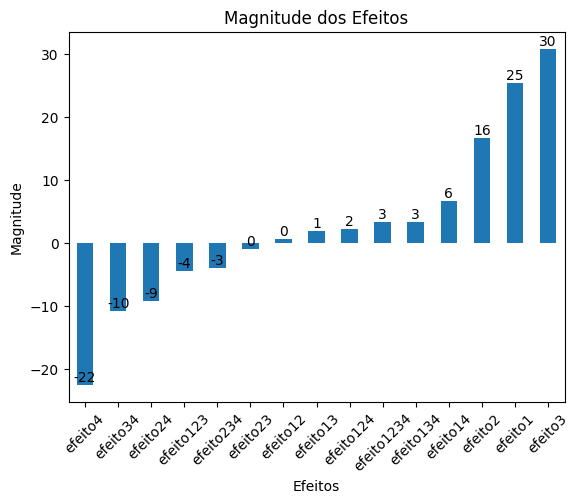

In [23]:
#Gráfico dos efeitos brutos e as interações de 2, 3 e 4° ordem.
efeitos_brutos.plot(kind='bar')
for i, valor in enumerate(efeitos_brutos):
  plt.text(i, valor, int(valor), ha='center', va='bottom')
plt.xlabel('Efeitos')
plt.ylabel('Magnitude')
plt.title('Magnitude dos Efeitos')
plt.xticks(rotation=45)
plt.show()

# Calculando a porcentagem de cada efeito

In [24]:
#Elevando os efeitos ao quadrado para retirar o sinal negativo
quadrado_efeitos = efeitos_brutos ** 2

In [25]:
#Somando todos os efeitos
soma_efeitos = quadrado_efeitos.sum()

In [26]:
# Definindo a porcentagem de cada efeito
porcentagens = (quadrado_efeitos / soma_efeitos) * 100

In [27]:
#Colocando as porcentagens em ordem crescente
porcentagens = porcentagens.sort_values(ascending=True)

# Calculando a área da curva e z score para o gráfico de probabilidade dos efeitos

In [28]:
#Definindo uma curva com 15 partes
zero = 0
incremento = 1/15
elementos = 15

inicio = [zero + i * incremento for i in range(elementos)]

In [29]:
#Sequência númerica de 15
seq = list(range(1, 16))

final = [num/15 for num in seq]

In [30]:
# Somando as listas para poder gerar a média
soma_listas = [x + y for x, y in zip(inicio, final)]

In [31]:
# Média das listas que representa a probabilidade debaixo da curva
ponto_central = [i /2 for i in soma_listas]

In [32]:
#Calculando a média e desvio padrão
media = np.mean(ponto_central)
std = np.std(ponto_central)

In [33]:
#Calculando o z score
z = np.round([(i - media) / std for i in ponto_central], decimals=3)

# Gráfico de porcentagem de contribuição dos efeitos e de probabilidade

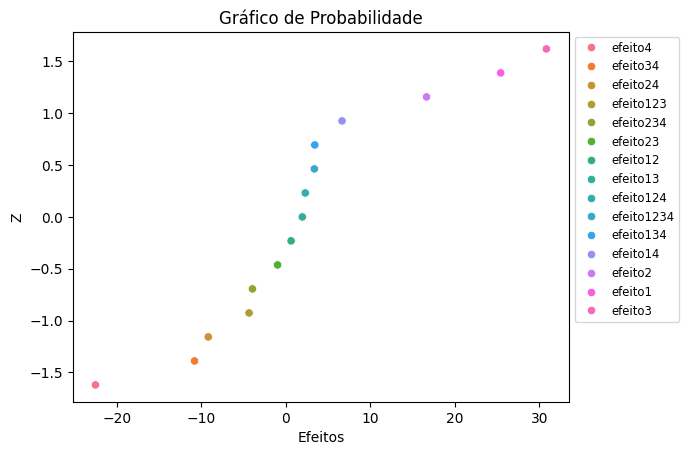

In [39]:
# Gráfico de probabilidades
import seaborn as sns

prob = sns.scatterplot(x=efeitos_brutos.values, y=z, hue=efeitos_brutos.index)
prob.set_title('Gráfico de Probabilidade')
prob.set_xlabel('Efeitos')
prob.set_ylabel('Z')
plt.legend(fontsize='small',  loc='lower left', bbox_to_anchor=(1, 0.2));

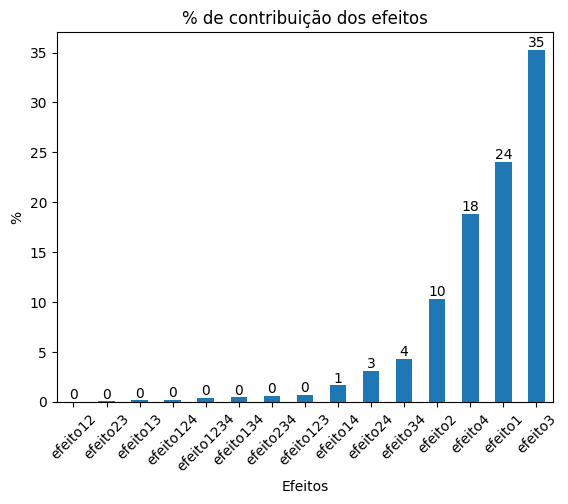

In [40]:
# Gráfico de contribuição efetiva
porcentagens.plot(kind='bar')
for i, valor in enumerate(porcentagens):
  plt.text(i, valor, int(valor), ha='center', va='bottom')
plt.xlabel('Efeitos')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.title('% de contribuição dos efeitos')
plt.show()





---


# Conclusão

Todas as 4 variáveis são importantes e significativas. Em ordem de significância, a variável corrente é a mais significativa e com efeito positivo alto. Logo, para maximizar a resposta, é necessário realizar o experimento com essa variável no nível alto.

As variáveis tempo e concentração de NaCl também são importantes e possuem efeito positivo, então deve-se trabalhar com elas no nível alto.

A variável 4 (tipo de anodo) é uma variável qualitativa, porém importante e com efeito negativo. Sua porcentagem de contribuição é de 18%, mais significativa que a variável 2. Por possui efeito negativo, deve-se trabalhar com essa variável no nível baixo, ou seja, com o anodo de IrO2.

Após os efeitos principais, em ordem de importância, temos as interações Corrente-Anodo (efeito34) e NaCl-Anodo (efeito24). Os efeitos terciários e quartenários são insignificantes.

Como o experimento não foi realizado com réplicas, não é possível estimar o erro nem modelar a regressão.

O objetivo do experimento foi realizar uma triagem e observar se é possível trabalhar com menos variáveis.

E conclui-se que não, pois todas as variáveis são importantes.